# Assignment 03

##### 1. Input points

plot a set of points $\{ (x^{(i)}, y^{(i)})\}$ that are loaded from 'data.csv' file (in black color)\

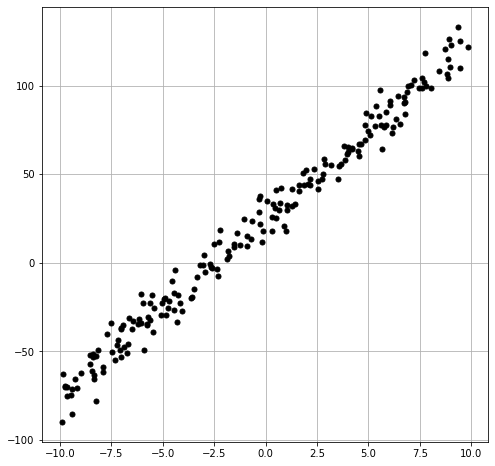

In [2]:
import numpy as np
import matplotlib.pyplot as plt

path = "data.csv"
data = np.genfromtxt(path, delimiter=',')

x_data = data[:, 0]
y_data = data[:, 1]

plt.figure(figsize=(8, 8))
plt.plot(x_data, y_data, 'ko', linewidth=0, markersize=5)
plt.grid()
plt.show()


##### 2. linear regression result 
plot a set of points $\{ (x^{(i)}, y^{(i)}) \}$ that are loaded from 'data.csv' file (in black color)

plot a straight line obtained by the optimal linear regression based on the given set of points (in red color)

the estimated straight line (linear function) is superimposed on the set of points


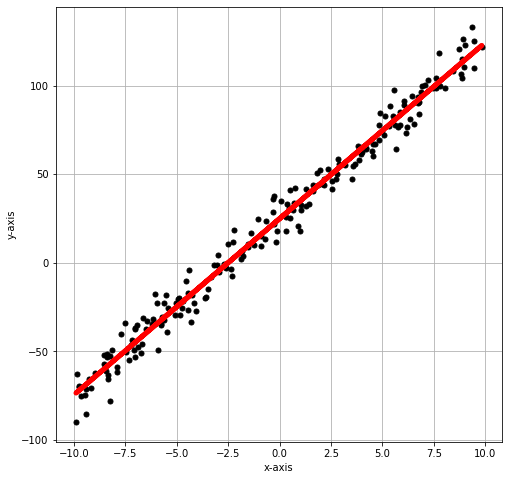

theta_0 = 24.9074
theta_1 = 9.9346


In [3]:
m = len(x_data)

x = x_data
y = y_data

# calculate linear regression parameters
theta0 = (sum(y)*sum(x**2) - sum(x)*sum(x*y)) / ( m * sum(x**2) - sum(x)**2)
theta1 = (m*sum(x*y) - sum(x)*sum(y))/ ( m * sum( x**2 ) - sum(x)**2)



# plot the figure
plt.figure(figsize=(8, 8))
plt.plot(x,y,'ko', linewidth=0, markersize=5)
plt.plot(x, theta0 + theta1 * x,'r', linewidth=5)
plt.ylabel('y-axis')
plt.xlabel('x-axis')
plt.grid()
plt.show()

# print out the value of theta
print('theta_0 = %.4f' % theta0)
print('theta_1 = %.4f' % theta1)
